In [1]:
%matplotlib inline
from pylab import *

In [2]:
from classy import *

Version  1.0.6
Version:  0.0.31


In [3]:
images=image.load_images('RotoPhotos1/squares1/')

[Black]: 79 files found
[White]: 74 files found
[Nothing]: 147 files found


In [4]:
data=image.images_to_vectors(images)

300 vectors of length 63075
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p63070', 'p63071', 'p63072', 'p63073', 'p63074'  (63075 features)
Target values given.
Target names: 'Black', 'White', 'Nothing'
Mean:  [ 80.65333333  70.65333333 104.78666667 ...  95.70666667  88.1
 114.24      ]
Median:  [ 83.   68.  101.  ...  92.5  79.  109. ]
Stddev:  [11.62066359 21.10402384 27.21190589 ... 17.89787573 30.43654602
 32.89684483]


In [5]:
data_train,data_test=split(data,test_size=0.2)

Original vector shape:  (300, 63075)
Train vector shape:  (240, 63075)
Test vector shape:  (60, 63075)


## Classifier

In [10]:
C=NaiveBayes()
C.fit(data_train.vectors,data_train.targets)
print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Training Set: 97.5
On Test Set: 96.66666666666667


In [11]:
C.means

array([[ 81.06666667,  73.83333333, 109.3       , ...,  95.81666667,
         87.91666667, 113.96666667],
       [ 77.69491525,  66.22033898,  96.47457627, ...,  91.86440678,
         81.84745763, 112.38983051],
       [ 81.39669421,  69.85950413, 104.68595041, ...,  96.38016529,
         90.08264463, 115.55371901]])

In [12]:
C.means.shape

(3, 63075)

In [13]:
mean0=C.means[0,:]

In [14]:
mean0.shape

(63075,)

In [15]:
im0=mean0.reshape((145,145,3))

In [16]:
im0.shape

(145, 145, 3)

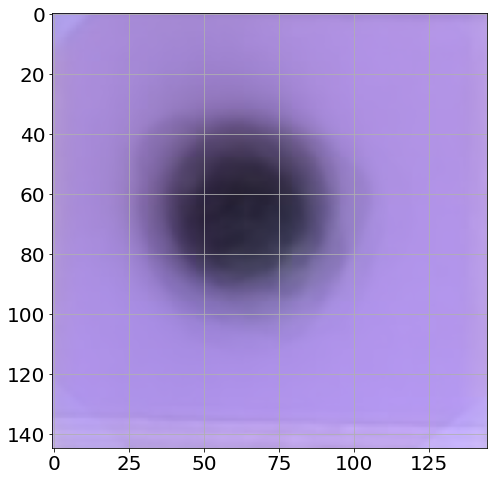

In [17]:
imshow(im0/im0.max())

## Perceptron Stuff

In [18]:
data_train.vectors.shape

(240, 63075)

In [19]:
number_of_features=data_train.vectors.shape[1]
number_of_categories=3  # the types of pieces

In [20]:
C=NumPyNetBackProp({
    'input':number_of_features,               # number of features
    'output':(number_of_categories,'linear'),  # number of classes
    'cost':'mse',
})

In [21]:
C.fit(data_train.vectors,data_train.targets,epochs=750)

layer       filters  size              input                output
   0 input                   240 x   1 x   1 x63075   ->   240 x   1 x   1 x63075
   1 connected               240 x   1 x   1 x63075   ->   240 x   3
   2 cost                    240 x   1 x   1 x   3   ->   240 x   1 x   1 x   3


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [02:54<00:00,  4.29it/s]


In [22]:
print(("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

('On Training Set:', 48.75)
('On Test Set:', 40.0)


In [23]:
len(C.weights)

1

In [24]:
C.weights[0]

array([[-0.0044078 ,  0.0038674 , -0.00521867],
       [-0.00389021,  0.00031397,  0.00454467],
       [-0.00195854,  0.0047076 , -0.00344932],
       ...,
       [-0.00360904,  0.00173656, -0.00527294],
       [-0.00367228,  0.00105225,  0.00166543],
       [-0.00250325, -0.00327686,  0.00318069]])

In [25]:
W=C.weights[0]
W.shape

(63075, 3)

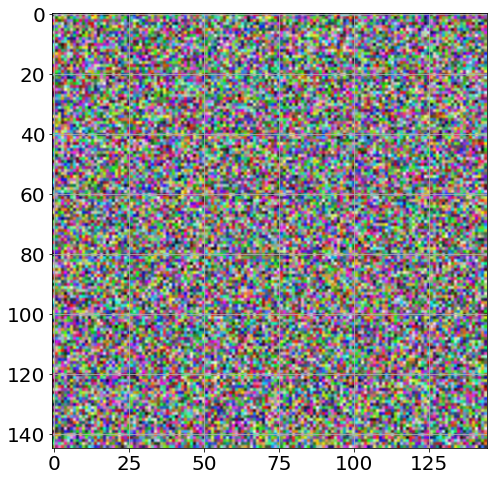

In [28]:
vec=W[:,0]
vec=(vec-W.min())/(W.max()-W.min())  # rescale to 0-1
im=vec.reshape((145,145,3))
imshow(im)

## Non-Linear Perceptron

In [41]:
data_train.vectors.shape

(240, 63075)

In [42]:
number_of_features=data_train.vectors.shape[1]
number_of_categories=3  # the types of pieces

In [43]:
C=NumPyNetBackProp({
    'input':number_of_features,               # number of features
    'output':(number_of_categories,'logistic'),  # number of classes
    'cost':'mse',
})

In [50]:
C.fit(data_train.vectors,data_train.targets,epochs=3000)

100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [12:34<00:00,  3.97it/s]


In [51]:
print(("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

('On Training Set:', 25.0)
('On Test Set:', 31.666666666666664)


In [52]:
len(C.weights)

1

In [53]:
C.weights[0]

array([[ 0.00561016, -0.01060122, -0.01128867],
       [ 0.00652862, -0.00987113, -0.01017389],
       [ 0.0098649 , -0.00915868, -0.00284331],
       ...,
       [ 0.0048065 , -0.007304  , -0.00683289],
       [ 0.00408721, -0.0071934 , -0.00856739],
       [ 0.00425501, -0.00197668, -0.00225186]])

In [54]:
W=C.weights[0]
W.shape

(63075, 3)

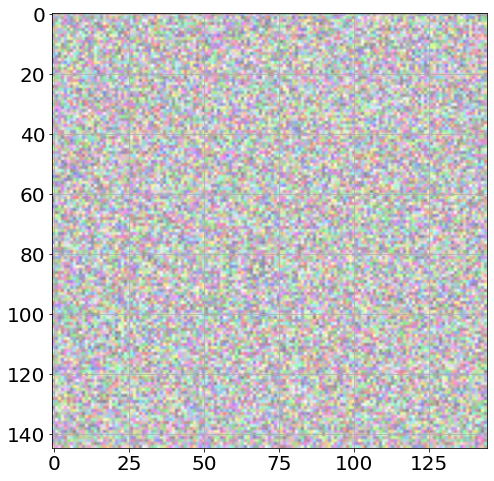

In [55]:
vec=W[:,0]
vec=(vec-W.min())/(W.max()-W.min())  # rescale to 0-1
im=vec.reshape((145,145,3))
imshow(im)